In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Create a combined DataFrame
combined_data = pd.merge(mouse_metadata,study_results,how="outer", on="Mouse ID")

In [22]:
drug_regiment_group = combined_data.groupby("Drug Regimen")

avg_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].median()
var_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].var()  
std_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].sem()


drug_stats_sum = pd.DataFrame({"Mean Tumor Volume": avg_tumor_volume,
                               "Median Tumor Volume": median_tumor_volume,
                               "Tumor Volume Variance": var_tumor_volume,
                               "Tumor Volume Std Deviation": std_tumor_volume,
                               "Tumor Vollume SEM" : sem_tumor_volume
                               }
)

drug_stats_sum


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Vollume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


([<matplotlib.axis.XTick at 0x23e9a369fd0>,
 <a list of 10 Text xticklabel objects>)

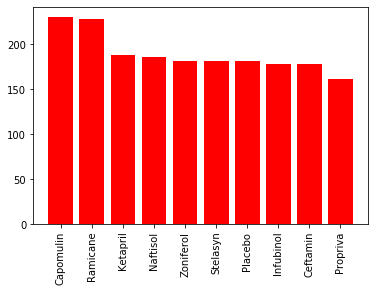

In [17]:
count_drug_regimen = combined_data['Drug Regimen'].value_counts()
reset_count_drug_regimen = count_drug_regimen.reset_index()
x_axis = np.arange(len(count_drug_regimen))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,count_drug_regimen, color = "r", align = "center")
plt.xticks(tick_locations, reset_count_drug_regimen["index"], rotation = "vertical")


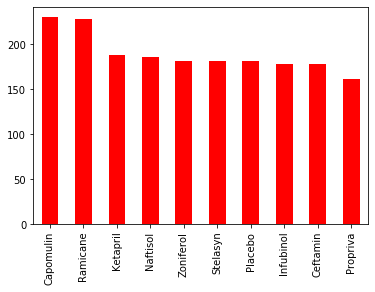

In [27]:
count_drug_regimen.plot(kind="bar",color = "r")

([<matplotlib.patches.Wedge at 0x23e9a2cdc88>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

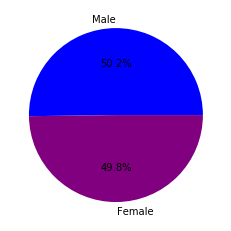

In [33]:
count_mice = mouse_metadata['Sex'].value_counts()
reset_count_mice = count_mice.reset_index()
colors = ["blue", "purple"]
plt.pie(count_mice, labels = reset_count_mice['index'],autopct="%1.1f%%", colors=colors)

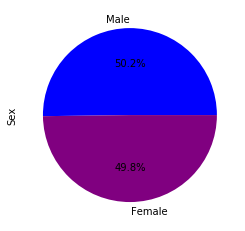

In [34]:
count_mice.plot(kind="pie", colors = colors, autopct="%1.1f%%", labels = reset_count_mice["index"])

In [ ]:
promising_regimens = ['']